# Loading the data

In [1]:
%pylab inline
import h5py

Populating the interactive namespace from numpy and matplotlib


In [2]:
f_train_l = h5py.File('train_labeled.h5','r')
f_train_ul = h5py.File('train_unlabeled.h5','r')
f_test = h5py.File('test.h5','r')
print(f_train_l.keys())
print(f_train_ul.keys())
print(f_test.keys())

KeysView(<HDF5 file "train_labeled.h5" (mode r)>)
KeysView(<HDF5 file "train_unlabeled.h5" (mode r)>)
KeysView(<HDF5 file "test.h5" (mode r)>)


In [3]:
a_train_l = f_train_l['train']
a_train_ul = f_train_ul['train']
a_test = f_test['test']
print(a_train_l.keys())
print(a_train_ul.keys())
print(a_test.keys())

KeysView(<HDF5 group "/train" (6 members)>)
KeysView(<HDF5 group "/train" (4 members)>)
KeysView(<HDF5 group "/test" (4 members)>)


In [4]:
b = a_train_ul['block0_values']
b.shape

(21000, 128)

In [5]:
# axis0 -> Labels [shape (129,)]
# axis1 -> id column [shape (9000,)] [shape (21000,)]
# block0_items -> traits labels [shape (128,)]
# block0_values -> traits values [shape (9000,128)] [shape (21000,128)]
# block1_items -> 'y' label
# block1_values -> y column (without label) [shape (9000,1)] [shape (21000,1)]

In [6]:
X_train_l = a_train_l['block0_values'][()]
X_train_l = np.float32(X_train_l)
y_train_l = a_train_l['block1_values'][()]
y_train_l = np.float32(y_train_l)
X_train_ul = a_train_ul['block0_values'][()]
X_train_ul = np.float32(X_train_ul)
y_train_l = y_train_l[:,0]
X_test = a_test['block0_values'][()]
X_test = np.float32(X_test)

In [7]:
X_total = X_train_l.tolist()+X_train_ul.tolist()
X_total = np.asarray(X_total)

In [8]:
#Are there zero columns?
def is_zero_vector(x):
    count = 0
    for i in arange(len(x)):
        if x[i] == 0.:
            count += 1
    if count == len(x):
        return True
    return False

In [9]:
zero_i = list([])
for k in arange(len(X_total[0,:])):   
    if is_zero_vector(X_total[:,k]):
        zero_i.append(k)

In [10]:
zero_i

[24, 28, 31, 41, 54, 61, 64, 80, 92, 93, 99, 125]

In [11]:
X_train_l = delete(X_train_l, zero_i, 1)
X_tarin_ul = delete(X_train_ul, zero_i, 1)
X_test = delete(X_test, zero_i, 1)

In [12]:
X_train_l.shape

(9000, 116)

# TensorFlow

In [13]:
import tensorflow as tf

In [14]:
evecs = np.float32(zeros([116,116]))
evals = np.float32(zeros([116]))

In [15]:
#loss = - tf.matmul(tf.transpose(tf.matmul(x,v)),tf.matmul(x,v))

In [16]:
prog = array([])

In [ ]:
sess = tf.InteractiveSession()
for s in arange(116):
    print(s)
    x = tf.placeholder(tf.float32, shape=[None, 116])
    v = tf.Variable( tf.random_normal([116, 1], mean=0.1, stddev=0.1), trainable=True )
    v = tf.div(v,tf.sqrt(tf.matmul(tf.transpose(v),v)))
    sess.run(tf.initialize_all_variables())
    for i in arange(1000):
        print(i)
        loss = - tf.matmul(tf.transpose(tf.matmul(x,v)),tf.matmul(x,v)) + np.sum(evals[j]*tf.matmul(reshape(evecs[j],[116,1]).T,v)*tf.matmul(reshape(evecs[s],[116,1]).T,v) for j in arange(s))
        train_step = tf.train.GradientDescentOptimizer(0.000001).minimize(loss)
        _, lo = sess.run([train_step, loss], feed_dict={x:X_train_l})
        evecs[s] = reshape(v.eval(),[116])
        evals[s] = lo

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


In [18]:
evals

array([ -76231.46875, -152463.03125, -304926.03125, -609852.125  ,
       -653791.375  ,       0.     ,       0.     ,       0.     ,
             0.     ,       0.     ,       0.     ,       0.     ,
             0.     ,       0.     ,       0.     ,       0.     ,
             0.     ,       0.     ,       0.     ,       0.     ,
             0.     ,       0.     ,       0.     ,       0.     ,
             0.     ,       0.     ,       0.     ,       0.     ,
             0.     ,       0.     ,       0.     ,       0.     ,
             0.     ,       0.     ,       0.     ,       0.     ,
             0.     ,       0.     ,       0.     ,       0.     ,
             0.     ,       0.     ,       0.     ,       0.     ,
             0.     ,       0.     ,       0.     ,       0.     ,
             0.     ,       0.     ,       0.     ,       0.     ,
             0.     ,       0.     ,       0.     ,       0.     ,
             0.     ,       0.     ,       0.     ,       0.  

In [20]:
#train_step = tf.train.GradientDescentOptimizer(0.000001).minimize(l)

In [21]:
#train_step.run(feed_dict={x: X_train_l})

In [22]:
#_, lo = sess.run([train_step, l], feed_dict={x:X_train_l})

In [23]:
prog = array([])

In [24]:
for k in arange(116):
    for i in arange(1000):
        _, lo = sess.run([train_step, loss], feed_dict={x:X_train_l})
        prog = np.append(prog, lo)

InvalidArgumentError: Expected begin[0] in [0, 116], but got 118
	 [[Node: Slice_355 = Slice[Index=DT_INT32, T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_1/read, Slice_355/begin, Slice_355/size)]]
Caused by op 'Slice_355', defined at:
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-2915027bcca1>", line 1, in <module>
    loss = - tf.matmul(tf.transpose(tf.matmul(x,v)),tf.matmul(x,v)) + np.sum(evals[j]*tf.matmul(tf.transpose(tf.reshape(evecs[j,:],[116,1])),v)*tf.matmul(tf.transpose(tf.reshape(evecs[j,:],[116,1])),v) for j in arange(k))
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/numpy/core/fromnumeric.py", line 1825, in sum
    res = _sum_(a)
  File "<ipython-input-17-2915027bcca1>", line 1, in <genexpr>
    loss = - tf.matmul(tf.transpose(tf.matmul(x,v)),tf.matmul(x,v)) + np.sum(evals[j]*tf.matmul(tf.transpose(tf.reshape(evecs[j,:],[116,1])),v)*tf.matmul(tf.transpose(tf.reshape(evecs[j,:],[116,1])),v) for j in arange(k))
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 610, in <lambda>
    setattr(Variable, operator, lambda a, b: Variable._RunOp(operator, a, b))
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 625, in _RunOp
    return getattr(ops.Tensor, operator)(a._AsTensor(), b)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 167, in _SliceHelper
    sliced = slice(tensor, indices, sizes)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 217, in slice
    return gen_array_ops._slice(input_, begin, size, name=name)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1318, in _slice
    name=name)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/op_def_library.py", line 655, in apply_op
    op_def=op_def)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2154, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/Camilo/anaconda2/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1154, in __init__
    self._traceback = _extract_stack()


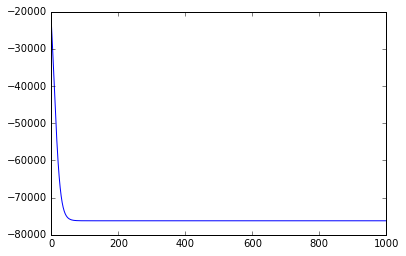

In [45]:
plot(prog)

In [46]:
prog

array([-23606.640625  , -25373.54492188, -27208.50390625, -29104.51953125,
       -31053.        , -33044.2578125 , -35067.87890625, -37112.4453125 ,
       -39166.07421875, -41216.73828125, -43252.5546875 , -45261.59765625,
       -47232.7890625 , -49155.99609375, -51021.7734375 , -52822.00390625,
       -54550.2265625 , -56200.73828125, -57769.58203125, -59253.6875    ,
       -60651.62890625, -61963.3359375 , -63188.9140625 , -64330.0390625 ,
       -65389.21484375, -66368.78125   , -67272.5703125 , -68103.9453125 ,
       -68866.7890625 , -69565.6484375 , -70203.6171875 , -70785.875     ,
       -71315.78125   , -71797.6015625 , -72234.703125  , -72631.1328125 ,
       -72989.765625  , -73314.625     , -73607.65625   , -73872.578125  ,
       -74111.375     , -74326.53125   , -74520.6171875 , -74695.09375   ,
       -74852.359375  , -74993.7578125 , -75120.6796875 , -75234.8984375 ,
       -75337.640625  , -75429.6953125 , -75512.3359375 , -75586.7890625 ,
       -75653.453125  , -

In [63]:
sqrt(dot(v.eval().T,v.eval()))

array([[ 1.00000012]], dtype=float32)

In [50]:
sqrt(-prog[900])/9000

0.030677897437792302

In [51]:
vv = v.eval()

In [52]:
fin = dot(X_train_l,vv)

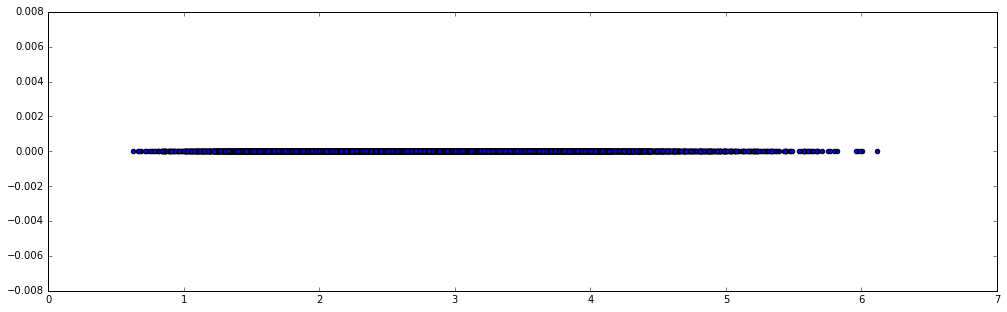

In [61]:
figure(figsize=(17,5))
scatter(fin, zeros(len(fin)))

In [24]:
tf.matmul(eve,v)

<tf.Tensor 'MatMul_4:0' shape=(1, 1) dtype=float32>

In [21]:
evecs[0] = np.ones(116)

In [24]:
evecs

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)